## Исследование данных о российском кинопрокате



Исследование по заказу Министерства культуры РФ. Работа проводится с данными, взятыми с [портала открытых данных Министертва культуры](https://opendata.mkrf.ru). Набор данных содержит информацию о прокатных удостоверениях, сборах и государственной поддержке фильмов, а также информацию с сайта КиноПоиск.

**Цель работы:** изучение рынка кинопроката и выделение возможных трендов. Разностороннее изучение фильмов с гос. поддержкой и оценка их успешности в прокате.

О качестве данных ничего не известно, поэтому перед тем, как приступить к анализу, потребуется обзор данных и возможная предобработка. Проверим данные на ошибки и различные аномалии и попробуем их исправить.

Таким образом исследование пройдет в 4 этапа:

- Обзор данных
- Предобработка данных
- Исследование рынка кинопроката
- Исследование фильмов, получивших государственную поддержку

### Шаг 1. Откротие файлов с данными и объединение их в один датафрейм. 

In [1]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
pd.options.display.float_format = '{:.0f}'.format

In [2]:
data = pd.read_csv('datasets/mkrf_movies.csv')
data_scnd = pd.read_csv('datasets/mkrf_shows.csv')

In [3]:
display(data.info())
display(data_scnd.info())
display(data.head())
display(data_scnd.head())
display(data_scnd.isna().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7486 entries, 0 to 7485
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   title                  7486 non-null   object 
 1   puNumber               7486 non-null   object 
 2   show_start_date        7486 non-null   object 
 3   type                   7486 non-null   object 
 4   film_studio            7468 non-null   object 
 5   production_country     7484 non-null   object 
 6   director               7477 non-null   object 
 7   producer               6918 non-null   object 
 8   age_restriction        7486 non-null   object 
 9   refundable_support     332 non-null    float64
 10  nonrefundable_support  332 non-null    float64
 11  budget                 332 non-null    float64
 12  financing_source       332 non-null    object 
 13  ratings                6519 non-null   object 
 14  genres                 6510 non-null   object 
dtypes: f

None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3158 entries, 0 to 3157
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   puNumber    3158 non-null   int64  
 1   box_office  3158 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 49.5 KB


None

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres
0,Открытый простор,221048915,2015-11-27T12:00:00.000Z,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,7.2,"боевик,драма,мелодрама"
1,Особо важное задание,111013716,2016-09-13T12:00:00.000Z,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,6.6,"драма,военный"
2,Особо опасен,221038416,2016-10-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер"
3,Особо опасен,221026916,2016-06-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер"
4,Особо опасен,221030815,2015-07-29T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер"


,puNumber,box_office
0,111000113,2450
1,111000115,61040
2,111000116,153030013
3,111000117,12260956
4,111000118,163684058


puNumber      0
box_office    0
dtype: int64

In [4]:
data = data.drop([1797]).reset_index(drop=True)

In [5]:
data = data.astype({'puNumber':'int32'})

In [6]:
data = data.merge(data_scnd, on='puNumber', how='left')

In [7]:
data.head()

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
0,Открытый простор,221048915,2015-11-27T12:00:00.000Z,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,7.2,"боевик,драма,мелодрама",NaN
1,Особо важное задание,111013716,2016-09-13T12:00:00.000Z,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,6.6,"драма,военный",NaN
2,Особо опасен,221038416,2016-10-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN
3,Особо опасен,221026916,2016-06-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN
4,Особо опасен,221030815,2015-07-29T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7485 entries, 0 to 7484
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   title                  7485 non-null   object 
 1   puNumber               7485 non-null   int32  
 2   show_start_date        7485 non-null   object 
 3   type                   7485 non-null   object 
 4   film_studio            7467 non-null   object 
 5   production_country     7483 non-null   object 
 6   director               7476 non-null   object 
 7   producer               6917 non-null   object 
 8   age_restriction        7485 non-null   object 
 9   refundable_support     332 non-null    float64
 10  nonrefundable_support  332 non-null    float64
 11  budget                 332 non-null    float64
 12  financing_source       332 non-null    object 
 13  ratings                6519 non-null   object 
 14  genres                 6510 non-null   object 
 15  box_

Итак, объединение прошло успешно, поэтому теперь мы имеем теперь мы имеем единый датафрейм, который состоит из 16 колонок. В колонках данные имеют различный тип, в данных присутствуют пропуски. Согласно полученной документации о данных:

* `title` — название фильма;
* `puNumber` — номер прокатного удостоверения;
* `show_start_date` — дата премьеры фильма;
* `type` — тип фильма;
* `film_studio` — студия-производитель;
* `production_country` — страна-производитель;
* `director` — режиссёр;
* `producer` — продюсер;
* `age_restriction` — возрастная категория;
* `refundable_support` — объём возвратных средств государственной поддержки;
* `nonrefundable_support` — объём невозвратных средств государственной поддержки;
* `financing_source` — источник государственного финансирования;
* `budget` — общий бюджет фильма;
* `ratings` — рейтинг фильма на КиноПоиске;
* `genres` — жанр фильма.
* `box_office` — сборы в рублях.

### Шаг 2. Предобработка данных

#### Шаг 2.1. Проверка типов данных


Посмотрим на уникальные значения в каждой колонке, чтобы оценить возможные аномалии в типах данных:

In [9]:
for column in data.columns:
    print(column, ': ', data[column].dtype, '\n\n', data[column].unique(), '\n\n\n')

title :  object 

 ['Открытый простор' 'Особо важное задание' 'Особо опасен' ...
 'Щенячий патруль: Скорей спешим на помощь!'
 'Машины песенки. Серия "Испанские мотивы"'
 'Машины песенки. Серия "Когда цветут кактусы"'] 



puNumber :  int32 

 [221048915 111013716 221038416 ... 124010819 124010619 124010719] 



show_start_date :  object 

 ['2015-11-27T12:00:00.000Z' '2016-09-13T12:00:00.000Z'
 '2016-10-10T12:00:00.000Z' ... '2019-12-24T12:00:00.000Z'
 '2019-12-28T12:00:00.000Z' '2019-12-30T12:00:00.000Z'] 



type :  object 

 ['Художественный' 'Анимационный' 'Прочие' 'Документальный'
 'Научно-популярный' ' Художественный' ' Анимационный'
 'Музыкально-развлекательный'] 



film_studio :  object 

 ['Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикчерз, Тиг Продакшнз'
 'Киностудия "Мосфильм"'
 'Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Платт Продакшнз, Рилейтивити Медиа, Спайгласс Интертейнмент, Стилкин Филмз, Топ Кау Продакшнз'
 ...
 'Дэниел Гродник Продакшнз, Вандерфилм Медиа Корпорэй

Внимательно изучив уникальные значения можно отметить следующие моменты:

* Значения колонки `show_start_date` следует преобразовать из типа **object** в тип **datetime**
* Значения колонки `ratings` явно записаны в разных шкалах оценки рейтинга: по 10-ти бальной шкале и в процентах, из-за чего тип данных определяется, как **object** вместо **float64** 
* Значения колонки `age_restriction` можно представить иначе: хранить только возраст, с момента достижения которого, человек может просмотреть соответствующий фильм. Это позволит преобразовать данный столбец к типу **int32**, что значительно упростит анализ данных позже.
* Значения почти во всех числовых колонках, особенно связанных с бюджетом имеют неудобный формат записи, их сложно группировать и анализировать. Если округлить их до определенного значения, то данный процесс будет гораздо проще

Итак, приступим к последовательной обработке этих недочетов:

Преобразуем значения колонки `show_start_date`.

In [10]:
data['show_start_date'] = pd.to_datetime(data['show_start_date'], format='%Y-%m-%dT%H:%M:%S')

In [11]:
data['show_start_date'].unique(), data['show_start_date'].dtype

(<DatetimeArray>
 ['2015-11-27 12:00:00+00:00', '2016-09-13 12:00:00+00:00',
  '2016-10-10 12:00:00+00:00', '2016-06-10 12:00:00+00:00',
  '2015-07-29 12:00:00+00:00', '2013-10-18 12:00:00+00:00',
  '2014-12-29 12:00:00+00:00', '2016-05-05 12:00:00+00:00',
  '2014-12-01 12:00:00+00:00', '2016-06-29 12:00:00+00:00',
  ...
  '2019-12-17 12:00:00+00:00', '2019-12-10 12:00:00+00:00',
  '2019-12-16 12:00:00+00:00', '2019-12-26 12:00:00+00:00',
  '2019-12-20 12:00:00+00:00', '2019-12-27 12:00:00+00:00',
  '2019-12-23 12:00:00+00:00', '2019-12-24 12:00:00+00:00',
  '2019-12-28 12:00:00+00:00', '2019-12-30 12:00:00+00:00']
 Length: 1964, dtype: datetime64[ns, UTC],
 datetime64[ns, UTC])

Преобразование прошло успешно, перейдем к преобразованию колонки `ratings`:

Напишем функцию, которая определит наличие символа % в подстроке и при его наличии преобразует в оценку по 10-ти бальной шкале:

In [12]:
def persent_to_float(row):
    if '%' in str(row['ratings']):
        return float(str(row['ratings'])[:2])/10
    else:
        return row['ratings']

In [13]:
data['ratings'] = data.apply(persent_to_float, axis=1)

Посмотрим на результат работы функции:

In [14]:
data['ratings'].unique()

array(['7.2', '6.6', '6.8', '7.7', '8.3', '8.0', '7.8', '8.1', '7.1',
       '6.0', '7.4', '5.8', '8.7', '6.3', '6.9', '5.0', '4.3', '7.3',
       '7.0', '6.4', nan, '8.2', '7.5', '6.7', '7.9', '5.9', '6.2', '5.6',
       '6.5', '2.4', '7.6', '6.1', '8.6', '8.5', '8.8', '5.5', '5.1',
       '5.7', '5.4', 9.9, '4.4', '4.5', '5.3', '4.1', '8.4', '2.6', '3.8',
       '4.6', '4.8', '4.0', '3.0', '1.6', '4.2', '5.2', '4.7', '4.9',
       '3.9', '2.7', '3.3', '2.9', 2.8, '3.7', '1.4', '3.1', 9.7, '3.5',
       '3.2', '2.8', '1.5', '2.1', '2.5', '9.2', '3.4', '1.1', '3.6', 8.3,
       6.4, 9.1, 9.4, 6.2, 7.9, 9.0, 1.9, 8.8, '1.0', 8.9, '1.3', '1.9',
       '1.8', '1.2', '1.7', '9.0', 9.8, '8.9', '9.1'], dtype=object)

Теперь преобразуем всю колонку к типу **float64**

In [15]:
data = data.astype({'ratings':'float64'})

И проверим правильность выполнения:

In [16]:
data['ratings'].unique(), data['ratings'].dtype

(array([7.2, 6.6, 6.8, 7.7, 8.3, 8. , 7.8, 8.1, 7.1, 6. , 7.4, 5.8, 8.7,
        6.3, 6.9, 5. , 4.3, 7.3, 7. , 6.4, nan, 8.2, 7.5, 6.7, 7.9, 5.9,
        6.2, 5.6, 6.5, 2.4, 7.6, 6.1, 8.6, 8.5, 8.8, 5.5, 5.1, 5.7, 5.4,
        9.9, 4.4, 4.5, 5.3, 4.1, 8.4, 2.6, 3.8, 4.6, 4.8, 4. , 3. , 1.6,
        4.2, 5.2, 4.7, 4.9, 3.9, 2.7, 3.3, 2.9, 2.8, 3.7, 1.4, 3.1, 9.7,
        3.5, 3.2, 1.5, 2.1, 2.5, 9.2, 3.4, 1.1, 3.6, 9.1, 9.4, 9. , 1.9,
        1. , 8.9, 1.3, 1.8, 1.2, 1.7, 9.8]),
 dtype('float64'))

Преобразование прошло успешно, теперь обработаем последний столбец:

In [17]:
def age_value_to_int(row):
    plus_index = str(row['age_restriction']).index('+')
    return str(row['age_restriction'])[1:plus_index]

In [18]:
data['age_restriction'] = data.apply(age_value_to_int, axis=1)

Оценим результат работы функции:

In [19]:
data['age_restriction'].unique()

array(['18', '6', '12', '16', '0'], dtype=object)

Осталось преобразовать все к нужному типу:

In [20]:
data = data.astype({'age_restriction' : 'int32'})

In [21]:
data['age_restriction'].unique()

array([18,  6, 12, 16,  0])

Проверка типов данных завершена, перейдем к следующему пункту обработки данных.

#### Шаг 2.2. Изучение пропусков в датафрейме

Посмотрим статистику по пропускам данных в датасете:

In [22]:
data.isna().sum()

title                       0
puNumber                    0
show_start_date             0
type                        0
film_studio                18
production_country          2
director                    9
producer                  568
age_restriction             0
refundable_support       7153
nonrefundable_support    7153
budget                   7153
financing_source         7153
ratings                   966
genres                    975
box_office               4327
dtype: int64

Пропуски присутствуют как в категориальных, так и в количественных параметрах. Они могли появиться по разным причинам:
* В столбцах `budget`, `nonrefundable_support`, `refundable_support`,`financing_source`, имеющих наибольше количество пропущенных значений, пропуски вероятнее всего появились из-за отсутствия официальной информации по данным фильмам. Возможно таковая либо не успела опубликоваться, либо не публикуется в принципе.
* В столбце `box_office`,который занимает второе место по количеству пропусков, они появились из-за объединения двух исходных датасетов с обязательным сохранением данных одного из них. При ненахождении одинаковых значений, по которым датасеты объединялись, значения в столбце `box_office` заменялись на пропуски.
* В колонке `ratings` пропуски могли появиться если, например, фильм вышел недавно и прошло еще мало времени, для формирования базы отзывов и оценок. Поэтому рейтинг мог быть просто еще не определен.
* В колонке `genres`, `film_studio`, `production_country`, `director`, `producer` пропуски могли появиться из-за человеческого фактора, или при отсутствии этих данных в источнике, на основе которого формировался датасет.

Заполнить пропуски в колонках `budget`, `nonrefundable_support`, `refundable_support`,`financing_source`,`box_office` какими то обоснованными значениями не представляется возможным, т.к. их более 95% во всем датафрейме и мы попросту исказим данные, если внесем туда что-либо поэтому можно удалить данные столбцы. Однако это лишит нас возможности хоть какого-то анализа зависимостей в этих колонках, поэтому заполним пропуски значением, которое логически невозможно, и при анализе будем исключать этот блок значений.

In [23]:
col_to_fillna = ['budget', 'nonrefundable_support' ,
                  'refundable_support', 'financing_source',
                  'box_office']

In [24]:
data[col_to_fillna] = data[col_to_fillna].fillna(-1)

In [25]:
data[col_to_fillna].isna().sum()

budget                   0
nonrefundable_support    0
refundable_support       0
financing_source         0
box_office               0
dtype: int64

Теперь преобразуем колонки, хранящие данные о бюджете фильма, к типу **int32**, чтобы впоследствии упросить анализ

In [26]:
data = data.astype({'budget' : 'int64',
                    'nonrefundable_support' : 'int32', 
                    'refundable_support' : 'int32',
                   'box_office' : 'int64'})

Пропуски устранены, про новое значение надо не забыть.

Теперь перейдем к обработке пропусков в оставшихся столбцах.

In [27]:
data.isna().sum()

title                      0
puNumber                   0
show_start_date            0
type                       0
film_studio               18
production_country         2
director                   9
producer                 568
age_restriction            0
refundable_support         0
nonrefundable_support      0
budget                     0
financing_source           0
ratings                  966
genres                   975
box_office                 0
dtype: int64

Посмотрим, как распределена колонка `ratings`, хранящая количественные параметры.

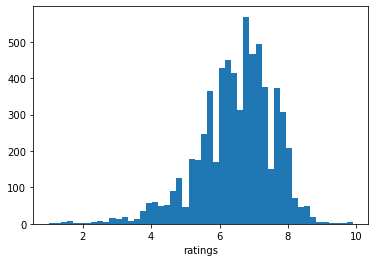

In [28]:
plt.hist(data['ratings'], 50)
plt.xlabel('ratings')
plt.show()

Большинство оценок расположено в границах 5-8 баллов, хотя пристутвуют и меньшие значения, оценим сколько их:

In [29]:
data.query('ratings > 8 or ratings < 5').shape

(872, 16)

Поскольку заполнить эти пропуски очень затруднительно, ведь:
- медианное значение по всему датафрейму может некорректно заполнить пропуск
- медианное значение по рейтингам других фильмов, которые снял режиссер, в записи о фильме которого мы обнаружили пропущенное значение, может быть просто невзможно посчитать, т.к. других записей о фильмах этого режиссера просто нет
- удалить такое кол-во записей тоже нельзя, поскольку это значительная часть наших данных

Оставим эти пропуски в датафрейме и будем проводить анализ опираясь только на реальные данные

In [30]:
data['ratings'].isna().sum()

966

Осталось обработать пропуски в колонках с категориальными значениями.

In [31]:
data['genres'].value_counts()

драма                          476
комедия                        352
мелодрама,комедия              222
драма,мелодрама,комедия        189
драма,мелодрама                183
                              ... 
боевик,мелодрама                 1
фэнтези,комедия,драма            1
приключения,детский,комедия      1
комедия,триллер,драма            1
детектив,фантастика,триллер      1
Name: genres, Length: 742, dtype: int64

Т.к. количество пропусков в них достаточно велико, а формат хранимых в них данных представляет собой сложную структуру, из которой тяжело выделить какие то математические обоснования, на основе которых можно было бы провести заполнения пропусков(например замена по стратегии `most frequent` с помощью SimpleImputer'а из библиотеки sklearn), то строки с пропусками <span style="color:Violet">заменим значением **unknown**</span>. Если бы, например, жанр у каждого фильма был бы только один, то можно было бы заполнить наиболее частым значением, а когда жанров много(2 и более), то определить какой жанр или группа жанров встречается чаще и как можно заполнить пропуски, не исказив исходные соотношения, становится очень сложно.

In [32]:
data.isna().sum()

title                      0
puNumber                   0
show_start_date            0
type                       0
film_studio               18
production_country         2
director                   9
producer                 568
age_restriction            0
refundable_support         0
nonrefundable_support      0
budget                     0
financing_source           0
ratings                  966
genres                   975
box_office                 0
dtype: int64

In [33]:
col_to_fillna2 = ['film_studio', 'production_country',
                  'director', 'producer', 'genres']

In [34]:
data[col_to_fillna2] = data[col_to_fillna2].fillna('unknown')

In [35]:
data.isna().sum()

title                      0
puNumber                   0
show_start_date            0
type                       0
film_studio                0
production_country         0
director                   0
producer                   0
age_restriction            0
refundable_support         0
nonrefundable_support      0
budget                     0
financing_source           0
ratings                  966
genres                     0
box_office                 0
dtype: int64

От пропусков избавились, в рамках наших возможностей, теперь перейдем обработке дубликатов в датафрейме.

#### Шаг 2.3. Изучение дубликатов в датафрейме


In [36]:
data.duplicated().sum()

0

Явных дубликатов нет, однако во время работы с уникальными значениями категориальных столбцов можно было заметить некоторые проблемы с записями внутри этих столбцов. Поэтому возможны неявные дубликаты, которые мы найдем лишь после обработки катеогриальных столбцов и устранения проблем в данных.

В датасете присутствуют столбцы, которые потенциально должны содержать только уникальные значения `puNumber` и `title`. Проверим, так ли это?

In [37]:
data['puNumber'].value_counts()

221054410    2
221154310    2
122001411    1
111008518    1
114002716    1
            ..
221015415    1
121021814    1
224028210    1
121013618    1
126002916    1
Name: puNumber, Length: 7483, dtype: int64

In [38]:
data['title'].value_counts()

День святого Валентина_                                        5
Рапунцель: Запутанная история                                  4
Белоснежка и охотник                                           4
Белая мгла /По комиксу Грега Рукка и Стива Либера/             4
Шерлок Холмс                                                   4
                                                              ..
Он, я и его друзья                                             1
Зеленый пояс Амура                                             1
Однажды... в Голливуде                                         1
Афтершок                                                       1
Прощай, моя королева! /По одноименному роману Шанталь Тома/    1
Name: title, Length: 6771, dtype: int64

Как видно, в данных присутствуют дубликаты в данных столбцах, вероятно они могли появиться при выходе новых частей серии фильмов или при перезапуске франшиз, из-за чего появились фильмы с одинаковыми названиями, давайте посмотрим на эти записи.

In [39]:
data.query('title == "День святого Валентина_"')

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
3901,День святого Валентина_,221083810,2010-07-15 12:00:00+00:00,Художественный,"Уорнер Бразерс, Нью Лайн Синема, Уэйн Райс, Ка...",США,Гарри Маршалл,Сэмюэл Дж.Браун,16,-1,-1,-1,-1,7,"мелодрама,комедия",-1
3990,День святого Валентина_,221068010,2010-05-14 12:00:00+00:00,Художественный,"Уорнер Бразерс, Нью Лайн Синема, Уэйн Райс, Ка...",США,Гарри Маршалл,Сэмюэл Дж.Браун,16,-1,-1,-1,-1,7,"мелодрама,комедия",-1
4069,День святого Валентина_,121002210,2010-02-03 12:00:00+00:00,Художественный,"Уорнер Бразерс, Нью Лайн Синема, Уэйн Райс, Ка...",США,Гарри Маршалл,Сэмюэл Дж.Браун,16,-1,-1,-1,-1,7,"мелодрама,комедия",-1
4195,День святого Валентина_,221136210,2010-11-30 12:00:00+00:00,Художественный,"Уорнер Бразерс, Нью Лайн Синема, Уэйн Райс, Ка...",США,Гарри Маршалл,Сэмюэл Дж.Браун,16,-1,-1,-1,-1,7,"мелодрама,комедия",-1
5069,День святого Валентина_,221066410,2010-06-01 12:00:00+00:00,Художественный,"Уорнер Бразерс, Нью Лайн Синема, Уэйн Райс, Ка...",США,Гарри Маршалл,Сэмюэл Дж.Браун,16,-1,-1,-1,-1,7,"мелодрама,комедия",-1


In [40]:
data.query('puNumber == 221054410 or puNumber == 221154310')

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
4637,Как жениться и остаться холостым,221154310,2010-12-17 12:00:00+00:00,Художественный,"Ше Вам, Скрипт Ассосье, Тэ Фэ 1 Фильм Продюксь...",Франция,Эрик Лартиго,"Амандин Било, Алан Шаба",16,-1,-1,-1,-1,7,"мелодрама,комедия",-1
4638,Иоанна - женщина на папском престоле /По роман...,221154310,2010-12-17 12:00:00+00:00,Художественный,"Константин Фильм, А Эр Ди Дегето Фильм, Дюне ...",Германия - Великобритания - Италия - Испания,Зенке Вортманн,"Оливер Бербен, Дорис Д.Хайнце, Фарук Элтан",16,-1,-1,-1,-1,8,"драма,мелодрама,история",-1
5066,Анализируй это!,221054410,2010-05-25 12:00:00+00:00,Художественный,"Уорнер Бразерс, Вилладж Роудшоу Филмз ЛТД",США-Австралия,ХЭрольд Рэмис,"Джейн Розенталь, Пола Уейнстейн",16,-1,-1,-1,-1,7,"комедия,криминал",-1
5067,Анализируй то!,221054410,2010-05-25 12:00:00+00:00,Художественный,"Уорнер Бразерс, Виллидж Роадшоу Пикчерз, Эн-Пи...",США,Гарольд Реймис,"Джейн Розенталь, Паул Уэйнстейн",12,-1,-1,-1,-1,7,"комедия,криминал",-1


В полученной таблице видно, что записи с номерном прокатного удостоверения 221154310 - это аболютно разные картины, не имеющие ничего общего. По описанию исходных данных: `У одного фильма может быть несколько прокатных удостоверений.`, - но не одно прокатное удостоверение у нескольких фильмов. Поэтому нужно изменить номер прокатного удостоверения для одного из этих двух фильмов, поскольку в данных реестра прокатных удостоверений явно появилаь аномалия.
Для прокатного удостоверения 221054410  картина немного иная. Очевидно, как в и предыдущем случае, они должны иметь различные номера удостоверений, так как это разные картины и информация по ним должна собираться раздельно, потому изменим и этот номер прокатного удостоверения. 
При изменении надо отдельно проконтроллировать, чтобы "новый" номер не совпал с номером другого фильма.

In [41]:
num_list = [221054410, 221154310]
for value in num_list:
    flag = True
    while flag:
        new_value = value + 1
        if new_value not in data['puNumber']:
            print(value, '--->', new_value)
            flag = False

221054410 ---> 221054411
221154310 ---> 221154311


In [42]:
data.at[4638, 'puNumber'] = 221154311
data.at[5067, 'puNumber'] = 221054411

In [43]:
data['puNumber'].value_counts()

122001411    1
121000711    1
121017119    1
114002716    1
121012718    1
            ..
121025916    1
221015415    1
121021814    1
224028210    1
126002916    1
Name: puNumber, Length: 7485, dtype: int64

С дубликатами в столбце `puNumber` успешно разобрались.

Дубликаты в столбце `title` это в большинстве следствие того, что согласно документации к данным `У одного фильма может быть несколько прокатных удостоверений.`. Это одни и те же фильмы, просто они получали несколько прокатных удостоверений в различные промежутки времени, поэтому появились эти дубликаты.

Поскольку их существование обосновано условиями предметной области, их стоит оставить в датасете. Это позволит провести анализ данных фильмов, например, в разлчиные временные участки.

#### Шаг 2.4. Изучение категориальных значений

Почти во всех таких колонках видна одна и та же проблема: многие значения повторяются и могут встречаться в различных комбинациях или записях. Например: 
* ФИО продюсеров может быть записано полностью или с сокращениями, и хотя человек один и тот же, то подстроки разные и автоматическими методами их не обработать; 
* жанры в различных сочетаниях тоже создают разные подстроки, хотя хранят одни и те же значения;
* страны производства фильма тоже могут совпадать, но быть записаны в разных форматах и в различном порядке, что тоже является искажением реальной картины.
* рядом со словами в строках могут содержаться лишние пробелы, что видно на уникальных значениях колонки `type`
и т. д.

Попробуем исправить эти проблемы. Внимательно посмотрев на столбцы с категориальными значениями, можно увидеть, что зачастую значения в них разделены следующими символами:
* "," или ", "
* " - " или "-"

Если написать функцию, которая будет, опираясь на эти разделители, выбирать из подстроки все значения, заносить их список, затем сортировать его и возвращать обратно в виде строки, то данные аномалии можно будет спокойно обработать. Однако не стоит забывать, что для таких параметров, как жанр или страна производства, важен порядок, поэтому создадим отдельный список, в который будем вносить первый элемент для каждой записи в этих колонках. Так мы сохраним главную информацию и позже внесем ее в наш датафрейм.

In [44]:
main_genres = []
main_directors = []

In [45]:
def categ_wout_sep(row, column):  
    final_str=''
    if ', ' in str(row[column]):
        cell_to_str = str(row[column]).split(', ')
        if column == 'genres':
            main_genres.append(cell_to_str[0])
        elif column == 'director':
            main_directors.append(cell_to_str[0])
        cell_to_str = sorted(cell_to_str)
        final_str = ', '.join([item for item in cell_to_str])
    elif ' - ' in str(row[column]):
        cell_to_str = str(row[column]).split(' - ')
        if column == 'genres':
            main_genres.append(cell_to_str[0])
        elif column == 'director':
            main_directors.append(cell_to_str[0])
        cell_to_str = sorted(cell_to_str)
        final_str = ', '.join([item for item in cell_to_str])
    elif ',' in str(row[column]):
        cell_to_str = str(row[column]).split(',')
        if column == 'genres':
            main_genres.append(cell_to_str[0])
        elif column == 'director':
            main_directors.append(cell_to_str[0])
        cell_to_str = sorted(cell_to_str)
        final_str = ', '.join([item for item in cell_to_str])
    elif '-' in str(row[column]):
        cell_to_str = str(row[column]).split('-')
        if column == 'genres':
            main_genres.append(cell_to_str[0])
        elif column == 'director':
            main_directors.append(cell_to_str[0])
        cell_to_str = sorted(cell_to_str)
        final_str = ', '.join([item for item in cell_to_str])
    else:
        if column == 'genres':
            main_genres.append(str(row[column]))
        elif column == 'director':
            main_directors.append(str(row[column]))
        return str(row[column])
    if column != 'director':
        return final_str
    else:
        return str(row[column])

Применим функцию к колонке `genres`

In [46]:
data['genres'] = data.apply(categ_wout_sep, axis=1, column='genres')

In [47]:
data['genres'].unique()

array(['боевик, драма, мелодрама', 'военный, драма',
       'боевик, триллер, фантастика', 'драма', 'комедия, мелодрама',
       'комедия, мелодрама, мюзикл', 'комедия, криминал',
       'боевик, детектив, триллер', 'боевик, драма, приключения',
       'драма, спорт', 'драма, мелодрама, триллер',
       'драма, комедия, мелодрама', 'драма, мелодрама', 'драма, история',
       'драма, мелодрама, семейный', 'комедия, криминал, мелодрама',
       'комедия', 'боевик, драма, криминал', 'драма, комедия',
       'комедия, ужасы, фантастика',
       'короткометражка, мелодрама, мультфильм', 'драма, криминал',
       'мультфильм, фантастика, фэнтези', 'драма, криминал, триллер',
       'биография, драма, мелодрама', 'военный, драма, комедия',
       'детектив, драма, фантастика', 'мюзикл, семейный', 'unknown',
       'военный, драма, приключения', 'документальный, драма',
       'биография, драма, история', 'боевик, драма, триллер',
       'боевик, фэнтези', 'боевик, комедия, криминал',
       

А теперь к колонке `production_country`, предварительно избавившись от лишних пробелов

In [48]:
data['production_country'] = data['production_country'].str.strip()

In [49]:
data['production_country'] = data.apply(categ_wout_sep, axis=1, column='production_country')

In [50]:
data['production_country'].unique()

array(['США', 'СССР', 'Франция', 'Венгрия, СССР',
       'Великобритания, Германия', 'Великобритания, Италия',
       'Чехословакия', 'США, Турция, Франция', 'Новая Зеландия',
       'Испания, Канада, Франция', 'Германия, США', 'Великобритания, США',
       'Великобритания', 'Мексика, США, Франция',
       'Казахстан, Россия, США', 'СССР, Швеция',
       'Англия, ГДР, Куба, СССР, Франция', 'Германия',
       'Великобритания, Германия, КНР, США',
       'Западный Берлин, ПНР, СССР, ЧССР', 'Италия, СССР', 'Гонконг, КНР',
       'США, Франция', 'Великобритания, США, Франция, Япония',
       'Великобритания, Гонконг, Сингапур, Таиланд', 'Канада, США',
       'Великобритания, Италия, США, Франция',
       'Великобритания, Германия, Ирландия', 'Чехия', 'Австралия, США',
       'СССР, Финляндия', 'Австрия, Великобритания, США, Франция',
       'Бельгия, США', 'Великобритания, Ирландия, США',
       'Великобритания, Испания, Италия, Люксембург, Нидерланды, США',
       'Великобритания, США, Фр

In [51]:
data['production_country'].value_counts()

США                                                      2175
Россия                                                   1820
СССР                                                      377
Франция                                                   302
Великобритания                                            259
                                                         ... 
СССР, ФРГ                                                   1
Великобритания, Испания, США, Финляндия, Франция            1
Бельгия, Великобритания, Испания, Португалия, Франция       1
Бельгия, Люксембург                                         1
Россия, Румыния                                             1
Name: production_country, Length: 684, dtype: int64

Избавимся от лишних пробелов и в колонке `type`

In [52]:
data['type'] = data['type'].str.strip()

In [53]:
data['type'].value_counts()

Художественный                5908
Анимационный                   829
Прочие                         406
Документальный                 288
Научно-популярный               53
Музыкально-развлекательный       1
Name: type, dtype: int64

Посмотрим еще раз на уникальные значения в столбцах `producer` и `director`

In [54]:
data['director'].unique()

array(['Кевин Костнер', 'Е.Матвеев', 'Тимур Бекмамбетов', ...,
       'Ник Пауэлл', 'А.Беляев', 'И.Трусов'], dtype=object)

In [55]:
data['producer'].unique()

array(['Дэвид Валдес, Кевин Костнер, Джейк Эбертс', 'unknown',
       'Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит', ...,
       'Поппи Бегум, Ник Пойнц',
       'Джефф Боулер, Дэниэл Гродник, Луильо Руис, Брэт Саксон, Кирк Шоу',
       'Дженнифер Додж'], dtype=object)

Эти данные выглядят правдоподобно, проверим не появились ли дубликаты после наших преобразований:

In [56]:
data.duplicated().sum()

0

Явных дубликатов все еще не видно, тогда перейдем к анализу числовых параметров.

#### Шаг 2.5. Проверка количественных значений

Еще раз взглянем на данные в количественных столбцах:

In [57]:
col_list = []
for column in data.columns:
    if ((data[column].dtype == 'float64') or (data[column].dtype == 'int32') or (data[column].dtype == 'int64')) and column != 'puNumber':
        col_list.append(column)
col_list

['age_restriction',
 'refundable_support',
 'nonrefundable_support',
 'budget',
 'ratings',
 'box_office']

In [58]:
def data_numeric_check():
    for column in col_list:
        print('-' * 10, column, '-' * 10)
        display(data.loc[data[column] != -1][column].describe())
        plt.hist(data[column])
        plt.show()
        print()

---------- age_restriction ----------


count   7485
mean      13
std        6
min        0
25%       12
50%       16
75%       16
max       18
Name: age_restriction, dtype: float64

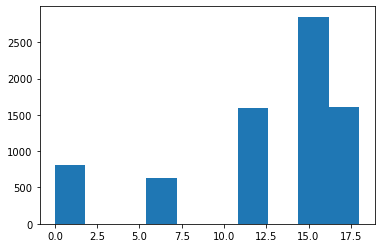


---------- refundable_support ----------


count         332
mean     11864458
std      24916555
min             0
25%             0
50%             0
75%      15000000
max     180000000
Name: refundable_support, dtype: float64

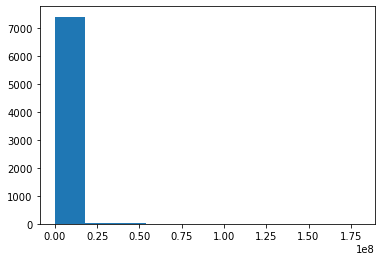


---------- nonrefundable_support ----------


count         332
mean     48980989
std      59980118
min             0
25%      25000000
50%      30000000
75%      40375000
max     400000000
Name: nonrefundable_support, dtype: float64

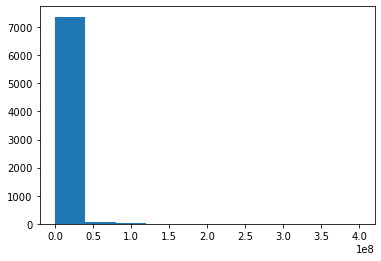


---------- budget ----------


count          332
mean     127229717
std      188588333
min              0
25%       42000000
50%       68649916
75%      141985320
max     2305074303
Name: budget, dtype: float64

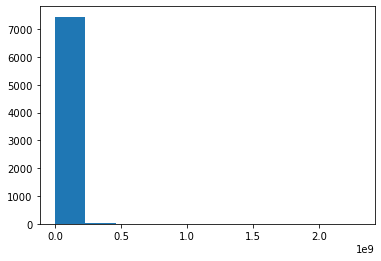


---------- ratings ----------


count   6519
mean       6
std        1
min        1
25%        6
50%        7
75%        7
max       10
Name: ratings, dtype: float64

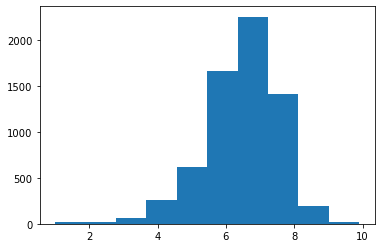


---------- box_office ----------


count         3158
mean      76478696
std      240353123
min              0
25%          86239
50%        2327988
75%       23979670
max     3073568690
Name: box_office, dtype: float64

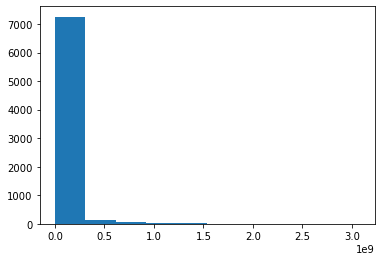

In [59]:
data_numeric_check()

В столбцах `refundable_support`, `nonrefundable_support`, `budget` можно заметить нулевые значения, что логически невозможно в случае столбца `budget` и в теории возможно для оставшихся двух. Стоит заметить, что эти столбцы связаны следующим соотношением:

`budget` >= `refundable_support` + `nonrefundable_support`

Другими словами, значение в столбце `budget` не может быть меньше суммы столбцов `refundable_support` и `nonrefundable_support`, поэтому следует проверить данные на наличие подобных искажений и исправить их, если придется.

In [60]:
data.query('budget < refundable_support + nonrefundable_support').shape

(17, 16)

Мы имеем 17 записей, которые не выполняют описаное соотношение, а значит нужно исправить эти записи так, чтобы они это соотношение выполнили.

Для этого напишем функцию, которая будет вычислять разность между `budget` и суммой `refundable_support` и `nonrefundable_support` и прибавлять эту разность назад к `budget`. Таким образом мы сможем сделать данные максимально реалистичными, используя лишь ту информацию, которая у нас имеется(если у фильма было сторонне негосударственное финансирование, то без дополнительных данных об этом мы не узнаем)

In [61]:
def budget_eqial_support(row):
    if row['budget'] < row['refundable_support'] + row['nonrefundable_support']:
        return row['refundable_support'] + row['nonrefundable_support'] - row['budget']
    else:
        return row['budget']

In [62]:
data['budget'] = data.apply(budget_eqial_support, axis=1)

Проверим результат:

In [63]:
data.query('budget < refundable_support + nonrefundable_support').shape

(0, 16)

Посмотрим на новые распределения числовых колонок:

---------- age_restriction ----------


count   7485
mean      13
std        6
min        0
25%       12
50%       16
75%       16
max       18
Name: age_restriction, dtype: float64

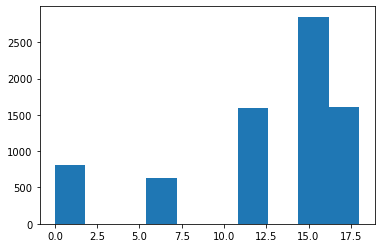


---------- refundable_support ----------


count         332
mean     11864458
std      24916555
min             0
25%             0
50%             0
75%      15000000
max     180000000
Name: refundable_support, dtype: float64

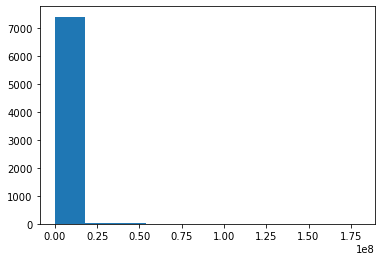


---------- nonrefundable_support ----------


count         332
mean     48980989
std      59980118
min             0
25%      25000000
50%      30000000
75%      40375000
max     400000000
Name: nonrefundable_support, dtype: float64

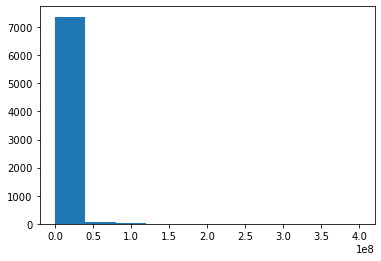


---------- budget ----------


count          332
mean     131422396
std      187148243
min        6000000
25%       45524800
50%       71196902
75%      150000000
max     2305074303
Name: budget, dtype: float64

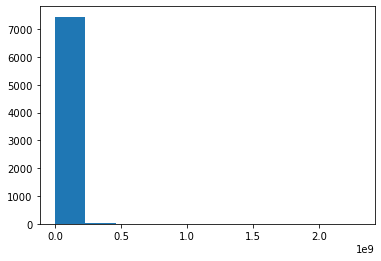


---------- ratings ----------


count   6519
mean       6
std        1
min        1
25%        6
50%        7
75%        7
max       10
Name: ratings, dtype: float64

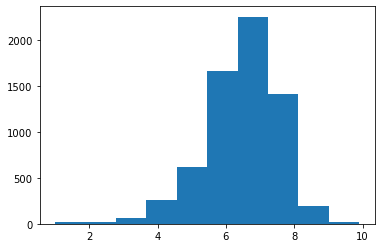


---------- box_office ----------


count         3158
mean      76478696
std      240353123
min              0
25%          86239
50%        2327988
75%       23979670
max     3073568690
Name: box_office, dtype: float64

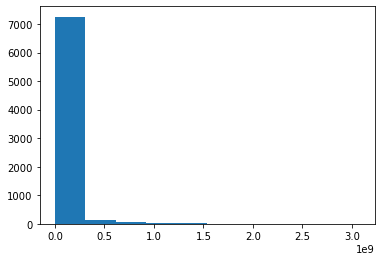

In [64]:
data_numeric_check()

Минимальное значение в столбце `box_office` выглядит как аномалия, вряд ли сборы могут быть так малы. Посмотрим, на данные, в которых значение сильно меньше первого квартиля:

In [65]:
data.query('box_office != -1 and box_office < 15000')

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
6,Любовь и голуби,111007013,2013-10-18 12:00:00+00:00,Художественный,"Киностудия ""Мосфильм""",СССР,В.Меньшов,unknown,12,-1,-1,-1,-1,8,"комедия, мелодрама",2700
18,Неподдающиеся,111003616,2016-02-12 12:00:00+00:00,Художественный,"Киностудия ""Мосфильм""",СССР,Ю.Чулюкин,unknown,6,-1,-1,-1,-1,8,"комедия, мелодрама",360
19,Неподсуден,111003716,2016-02-12 12:00:00+00:00,Художественный,"Киностудия ""Мосфильм""",СССР,"В.Краснопольский, В.Усков",unknown,6,-1,-1,-1,-1,8,драма,420
22,"Операция ""Ы"" и другие приключения Шурика",111007413,2013-10-18 12:00:00+00:00,Художественный,"Киностудия ""Мосфильм""",СССР,Л.Гайдай,unknown,6,-1,-1,-1,-1,9,"комедия, криминал, мелодрама",380
38,Мужики!..,111007213,2013-10-18 12:00:00+00:00,Художественный,"Киностудия ""Мосфильм""",СССР,И.Бабич,unknown,6,-1,-1,-1,-1,8,драма,1165
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5379,ШПИОН,111009411,2011-12-09 12:00:00+00:00,Художественный,"ООО ""Студия ""ТРИТЭ"" Никиты Михалкова",Россия,А.Андрианов,"С.Шумаков, Л.Верещагин",16,-1,-1,-1,-1,7,"боевик, комедия, криминал",5405
5387,ВОИН.com,111004411,2011-07-04 12:00:00+00:00,Художественный,"ООО ""Культурные инициативы""",Россия,Е.Бычкова,"В.Малышев, А.Малышев",12,-1,-1,-1,-1,5,комедия,465
5388,Кунг-фу Панда 2.,224021411,2011-11-15 12:00:00+00:00,Анимационный,ДримУоркс Анимэйшн,США,Дженнифер Ю,"Мелисса Кобб, Джонатан Айбел, Гленн Бергер",0,-1,-1,-1,-1,7,"боевик, мультфильм, фэнтези",9270
6580,Время собирать цветы,112025118,2019-01-01 12:00:00+00:00,Документальный,"ООО ""Краеведофф""",Россия,Г.Щерба,О.Ракшин,12,-1,-1,-1,-1,NaN,unknown,7175


Таких записей нашлось 593, что оставляет почти 20% от всех рассматриваемых записей колонки box_office. Удалять такой объем данных не хочется, поэтому оставим их в датасете, но будем помнить, что аномально маленькие значения присутствуют в этой колонке

---------- age_restriction ----------


count   7485
mean      13
std        6
min        0
25%       12
50%       16
75%       16
max       18
Name: age_restriction, dtype: float64

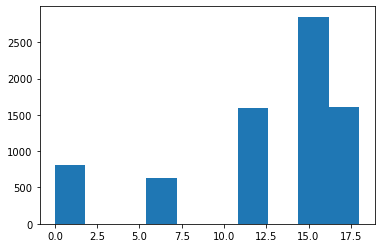


---------- refundable_support ----------


count         332
mean     11864458
std      24916555
min             0
25%             0
50%             0
75%      15000000
max     180000000
Name: refundable_support, dtype: float64

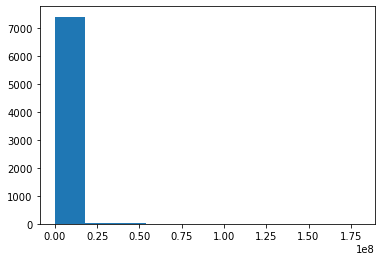


---------- nonrefundable_support ----------


count         332
mean     48980989
std      59980118
min             0
25%      25000000
50%      30000000
75%      40375000
max     400000000
Name: nonrefundable_support, dtype: float64

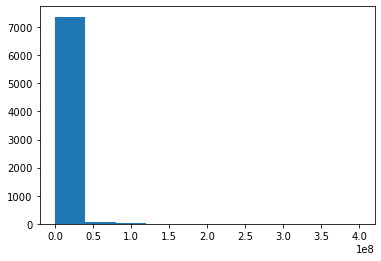


---------- budget ----------


count          332
mean     131422396
std      187148243
min        6000000
25%       45524800
50%       71196902
75%      150000000
max     2305074303
Name: budget, dtype: float64

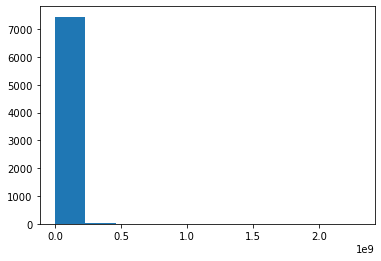


---------- ratings ----------


count   6519
mean       6
std        1
min        1
25%        6
50%        7
75%        7
max       10
Name: ratings, dtype: float64

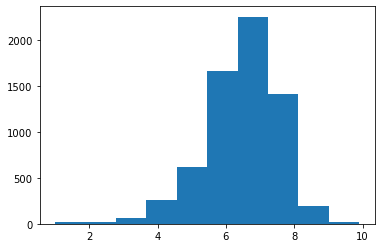


---------- box_office ----------


count         3158
mean      76478696
std      240353123
min              0
25%          86239
50%        2327988
75%       23979670
max     3073568690
Name: box_office, dtype: float64

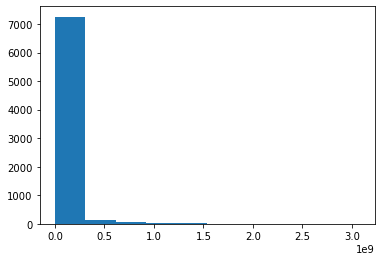

In [66]:
data_numeric_check()

Теперь мы окончательно изучили распределение числовых колонок и исправили аномалии, перейдем к следующему этапу подготовки датасета

#### Шаг 2.6. Добавление новых столбцов


In [67]:
data['show_year'] = data['show_start_date'].dt.year

In [68]:
data.head()

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office,show_year
0,Открытый простор,221048915,2015-11-27 12:00:00+00:00,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",18,-1,-1,-1,-1,7,"боевик, драма, мелодрама",-1,2015
1,Особо важное задание,111013716,2016-09-13 12:00:00+00:00,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,unknown,6,-1,-1,-1,-1,7,"военный, драма",-1,2016
2,Особо опасен,221038416,2016-10-10 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",18,-1,-1,-1,-1,7,"боевик, триллер, фантастика",-1,2016
3,Особо опасен,221026916,2016-06-10 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",18,-1,-1,-1,-1,7,"боевик, триллер, фантастика",-1,2016
4,Особо опасен,221030815,2015-07-29 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",18,-1,-1,-1,-1,7,"боевик, триллер, фантастика",-1,2015


- Создайте два столбца: с именем и фамилией главного режиссёра и основным жанром фильма. В столбцы войдут первые значения из списка режиссёров и жанров соответственно.

<div id="accordion">
    <div class="card">
        <div class="card-header" id="headingThree">
            <button class="btn btn-link collapsed" data-toggle="collapse" data-target="#collapseHint_2" aria-expanded="false" aria-controls="collapseHint_2">Подсказка</button>
        </div>
        <div id="collapseHint_2" class="collapse" aria-labelledby="headingThree" data-parent="#accordion">
            <div class="card-body">
Чтобы создать такие столбцы, лучше всего использовать собственную функцию. Эту функцию можно применить к двум столбцам сразу. 
            </div>
        </div>
    </div>
</div>

Поскольку главный жанр мы определяли и сохраняли на этапе анализа категориальных столбцов, то теперь мы можем создать необходимый нам столбец на основе сформированного тогда списка:

In [69]:
data['main_genre'] = pd.Series(main_genres)

Для определения главного режиссера используем ту же функцию, что и для обработки жанров и стран.

In [70]:
data['director'] = data.apply(categ_wout_sep, axis=1, column='director')

In [71]:
data['main_director'] = pd.Series(main_directors)

Посмотрим на результат

In [72]:
data.head(30)

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office,show_year,main_genre,main_director
0,Открытый простор,221048915,2015-11-27 12:00:00+00:00,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",18,-1,-1,-1,-1,7,"боевик, драма, мелодрама",-1,2015,боевик,Кевин Костнер
1,Особо важное задание,111013716,2016-09-13 12:00:00+00:00,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,unknown,6,-1,-1,-1,-1,7,"военный, драма",-1,2016,драма,Е.Матвеев
2,Особо опасен,221038416,2016-10-10 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",18,-1,-1,-1,-1,7,"боевик, триллер, фантастика",-1,2016,фантастика,Тимур Бекмамбетов
3,Особо опасен,221026916,2016-06-10 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",18,-1,-1,-1,-1,7,"боевик, триллер, фантастика",-1,2016,фантастика,Тимур Бекмамбетов
4,Особо опасен,221030815,2015-07-29 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",18,-1,-1,-1,-1,7,"боевик, триллер, фантастика",-1,2015,фантастика,Тимур Бекмамбетов
5,Остановился поезд,111013816,2016-09-13 12:00:00+00:00,Художественный,"Киностудия ""Мосфильм""",СССР,В.Абдрашитов,unknown,6,-1,-1,-1,-1,8,драма,-1,2016,драма,В.Абдрашитов
6,Любовь и голуби,111007013,2013-10-18 12:00:00+00:00,Художественный,"Киностудия ""Мосфильм""",СССР,В.Меньшов,unknown,12,-1,-1,-1,-1,8,"комедия, мелодрама",2700,2013,мелодрама,В.Меньшов
7,Любовь и сигареты,221074614,2014-12-29 12:00:00+00:00,Художественный,"Юнайтед Артистс, Грин Стрит Филмз, Айкон Интер...",США,Джон Туртурро,"Джон Пенотти, Джон Туртурро",18,-1,-1,-1,-1,7,"комедия, мелодрама, мюзикл",-1,2014,мюзикл,Джон Туртурро
8,Отпетые мошенники.,121011416,2016-05-05 12:00:00+00:00,Художественный,"Пульсар Продюксьон, ТФ1 Фильм",Франция,Эрик Беснард,Патрис Леду,18,-1,-1,-1,-1,8,"комедия, криминал",-1,2016,комедия,Эрик Беснард
9,Отпуск за свой счет,111019114,2014-12-01 12:00:00+00:00,Художественный,"Киностудия ""Мосфильм"", Телевидение ВНР","Венгрия, СССР",В.Титов,unknown,12,-1,-1,-1,-1,8,"комедия, мелодрама",-1,2014,мелодрама,В.Титов


- Посчитайте, какую долю от общего бюджета фильма составляет государственная поддержка.

Определим долю общего бюджета, которую составляет гос. поддержка, при этом не забываем, что значительная часть данных в этих колонках, заполнена "плейсхолдером" со значением -1. Учтем это при создании новой колонки.

In [73]:
def part_of_support(row):
    if row['budget'] == -1:
        return -1
    else:
        return round(((row['refundable_support'] + row['nonrefundable_support'])/row['budget']) * 100)

In [74]:
data['part_of_support_in_budget'] = data.apply(part_of_support, axis=1)

In [75]:
data.query('budget != -1')

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office,show_year,main_genre,main_director,part_of_support_in_budget
1281,Пока еще жива,111005313,2013-10-11 12:00:00+00:00,Художественный,"АНО содействия развитию кинематографии ""Ангел-...",Россия,А.Атанесян,"А.Атанесян, М.Бабаханов, Р.Бутко",16,0,26500000,79411900,Министерство культуры,8,"драма, мелодрама",365353,2013,драма,А.Атанесян,33
1448,Бесславные придурки,111003314,2014-03-28 12:00:00+00:00,Художественный,"ООО ""Компания ""АТК-Студио""",Россия,А.Якимчук,А.Тютрюмов,12,0,26000000,37142857,Министерство культуры,NaN,unknown,28140,2014,unknown,А.Якимчук,70
1498,Невидимки,111004213,2013-09-10 12:00:00+00:00,Художественный,"ООО ""Компания ""РЕАЛ-ДАКОТА""",Россия,"Р.Давлетьяров, С.Комаров","Р.Давлетьяров, А.Котелевский, А.Олейников",12,0,107847945,176023490,Фонд кино,5,"комедия, фантастика",19957031,2013,комедия,Р.Давлетьяров,61
1524,БЕРЦЫ,111004314,2014-05-05 12:00:00+00:00,Художественный,"ООО ""Студия ""Пассажир""",Россия,Е.Миндадзе (псевдоним Катя Шагалова),Л.Антонова,16,0,28000000,40574140,Министерство культуры,4,драма,55917,2014,драма,Е.Миндадзе (псевдоним Катя Шагалова),69
1792,Братья Ч,111004414,2014-04-23 12:00:00+00:00,Художественный,"ООО ""Студия ""Пассажир""",Россия,М.Угаров,"А.Миндадзе, Л.Антонова",16,0,25000000,40015122,Министерство культуры,6,драма,232100,2014,драма,М.Угаров,62
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7463,Союз спасения,111022019,2019-12-26 12:00:00+00:00,Художественный,"ЗАО ""Дирекция кино""",Россия,А.Кравчук,"А.Максимов, К.Эрнст",12,100000000,400000000,980000000,Фонд кино,6,"биография, драма, история",717703185,2019,история,А.Кравчук,51
7465,Иван Царевич и Серый Волк 4,114005019,2019-12-20 12:00:00+00:00,Анимационный,"ООО ""Студия анимационного кино ""Мельница""",Россия,"Д.Шмидт, К.Феоктистов","С.Сельянов, А.Боярский",6,100000000,0,190000000,Фонд кино,7,"мультфильм, приключения, семейный",501069235,2019,мультфильм,Д.Шмидт,53
7473,Вторжение,111022519,2019-12-23 12:00:00+00:00,Художественный,"ООО ""Арт Пикчерс Студия"", ООО ""Водород 2011""",Россия,Ф.Бондарчук,"Ф.Бондарчук, М.Врубель, А.Андрющенко, Д.Рудовский",12,100000000,400000000,944000000,Фонд кино,6,"боевик, фантастика",-1,2019,фантастика,Ф.Бондарчук,53
7475,Я свободен,111023019,2019-12-26 12:00:00+00:00,Художественный,"АО ""ТПО ""Киностудия им. М.Горького""",Россия,И.Северов,С.Зернов,12,0,30000000,46154000,Министерство культуры,6,драма,-1,2019,драма,И.Северов,65


### Шаг 3. Исследовательский анализ данных


Сгруппируем фильмы по годам, при этом посчитав количество вышедших фильмов в каждом году:

In [76]:
films_per_year = data.pivot_table(index='show_year', values='puNumber', aggfunc='count')
films_per_year

,puNumber
show_year,
2010,985
2011,622
2012,593
2013,630
2014,806
2015,705
2016,818
2017,505
2018,891


Для наглядности построим по полученным данным график:

<AxesSubplot:xlabel='show_year'>

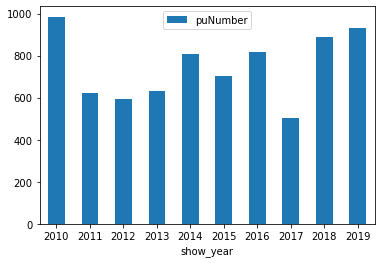

In [77]:
films_per_year.plot(y='puNumber', kind='bar', rot=0)

Больше всего вышло фильмов в 2010 году, меньше всего в 2017, в остальные года выходило примерно одинаковое кол-во фильмов

Выберем из датасета те данные, у которых известна информация о прокатах в кинотеатрах РФ, и произведем с ними тот же подсчет по годам:

In [78]:
films_with_info = data.query('box_office != -1')
films_with_info = films_with_info.pivot_table(index='show_year', values='puNumber', aggfunc='count')
films_with_info

,puNumber
show_year,
2010,105
2011,109
2012,128
2013,184
2014,279
2015,465
2016,526
2017,357
2018,475


Объединим данные в одну таблицу:

In [79]:
films_per_year = films_per_year.merge(films_with_info, on='show_year', how='left')
films_per_year

,puNumber_x,puNumber_y
show_year,,
2010,985,105
2011,622,109
2012,593,128
2013,630,184
2014,806,279
2015,705,465
2016,818,526
2017,505,357
2018,891,475


Построим график, на котором будет видно соотношение между кол-вом вышедших фильмов и фильмов, по которым есть информация о прокате:

<AxesSubplot:xlabel='show_year'>

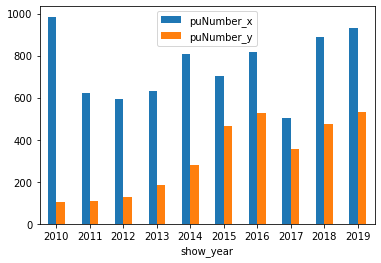

In [80]:
films_per_year.plot(y=['puNumber_x', 'puNumber_y'], kind='bar', rot=0)

Согласно полученному графику можно увидеть, что меньше всего фильмов с информацией о прокате было в 2010-2011 годах, и с 2012 по 2019 это количество увеличивалось и достигло максимума в 2019. Притом увеличилось так, что к 2019 году кол-во фильмов с информацией сравнимо с общим числом фильмов в год.

In [81]:
films_per_year['part_of_support'] = (films_per_year['puNumber_y'] / films_per_year['puNumber_x'])*100

In [82]:
films_per_year

,puNumber_x,puNumber_y,part_of_support
show_year,,,
2010,985,105,11
2011,622,109,18
2012,593,128,22
2013,630,184,29
2014,806,279,35
2015,705,465,66
2016,818,526,64
2017,505,357,71
2018,891,475,53


<AxesSubplot:xlabel='show_year'>

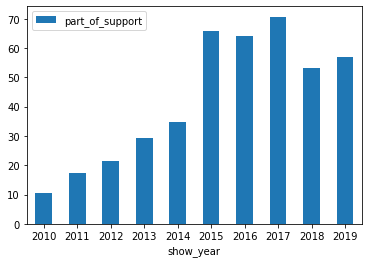

In [83]:
films_per_year.plot(y='part_of_support', kind='bar', rot=0)

- С помощью сводной таблицы посчитайте среднюю и медианную сумму сборов для каждого года.

In [84]:
films_with_info_scnd = data.query('box_office != -1')

In [85]:
films_with_info_scnd.pivot_table(index='show_year', values='box_office', aggfunc=('mean', 'median'))

,mean,median
show_year,,
2010,23130,1700
2011,129383,3000
2012,54339,5660
2013,161955,3522
2014,26684415,18160
2015,84940570,4920933
2016,91000570,3846679
2017,136032793,9968340
2018,104565059,8891102


<AxesSubplot:xlabel='show_year'>

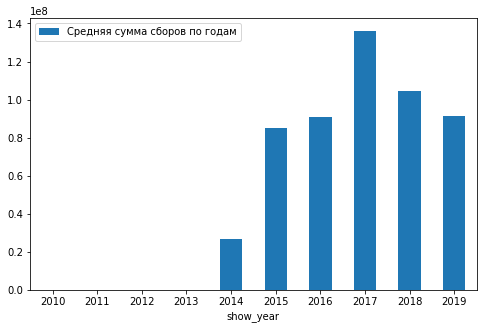

In [86]:
films_with_info_scnd.pivot_table(index='show_year', values='box_office', aggfunc=('mean', 'median')).plot(y='mean', kind='bar', figsize=(8, 5), label='Средняя сумма сборов по годам', rot=0)

<AxesSubplot:xlabel='show_year'>

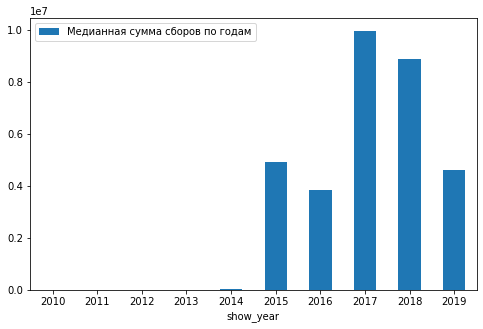

In [87]:
films_with_info_scnd.pivot_table(index='show_year', values='box_office', aggfunc=('mean', 'median')).plot(y='median', kind='bar', figsize=(8, 5), label='Медианная сумма сборов по годам', rot=0)

Среднее значение сильно отличается от медианного по причине сильной зависимости среднего значения, как метрики от кол-ва и размаха оцениваемой величины. Другими словами это значение может быть сильно смещено из-за того, что некоторые фильмы сильно успешнее или провальнее других, притом на фоне уменьшенной до одного года выборки это значение смещается еще сильнее, что и приводит к сильным расхождениям в значениях с медианной оценкой.

- Определите, влияет ли возрастное ограничение аудитории («6+», «12+», «16+», «18+» и т. д.) на сборы фильма в прокате в период с 2015 по 2019 год? Фильмы с каким возрастным ограничением собрали больше всего денег в прокате? Меняется ли картина в зависимости от года? Если да, предположите, с чем это может быть связано.

In [88]:
data_after_2015 = data.query('show_year >= 2015 and box_office > -1')

In [89]:
data_after_2015.pivot_table(index='age_restriction', values='box_office', aggfunc=('sum', 'median'))

,median,sum
age_restriction,,
0,2943318,809077403
6,13736207,55798610700
12,5065044,60619446530
16,5600007,76034733425
18,6154439,40759615355


<AxesSubplot:xlabel='age_restriction'>

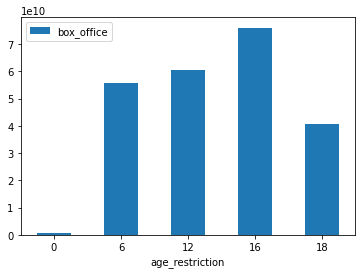

In [90]:
data_after_2015.pivot_table(index='age_restriction', values='box_office', aggfunc='sum').plot(y='box_office', kind='bar', rot=0)

C 2015 по 2019 год фильмы с возрастным ограниченем "0+" собрали меньше всего денег в прокате, а с ограничением "16+" больше всего. Видно, что суммарные сборы увеличиваются при увеличении порога ограничения, кроме фильмов с ограничением "18+"

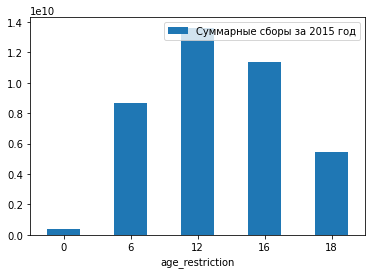

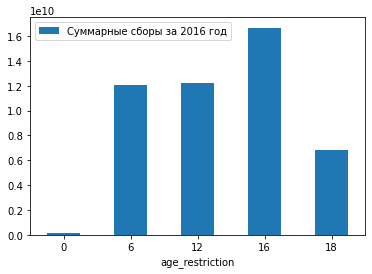

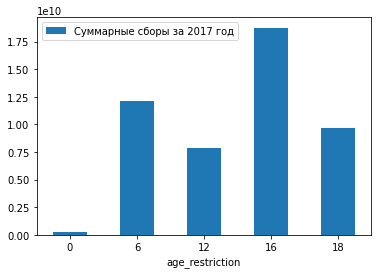

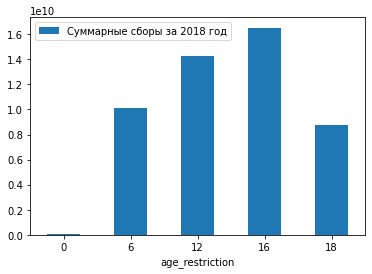

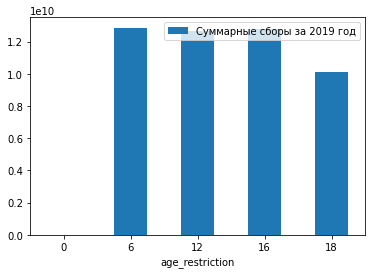

In [91]:
years_list = [2015, 2016, 2017, 2018, 2019]

for year in years_list:
    data_after_2015.query('show_year == @year').pivot_table(index='age_restriction', values='box_office', aggfunc='sum').plot(y='box_office', kind='bar', label=f'Суммарные сборы за {year} год', rot=0)

###### Изучив графики по каждому году можно сказать, что:
* В каждом году сборы фильмов с ограничением 0+ меньше всех
* Самая прибыльная категория все еще "16+"(в 2016, 2017 и 2018 она первая по сборам, во всех остальных - вторая)

Поэтому можно сказать, что при рассмотрении ситуации по годам общая картина сборов значительно не изменяется: самые прибыльные и наименее прибыльные категории остаются теми же.

Чтобы исключить возможное смещение посмотрим на медианные сборы в каждой возратной категории

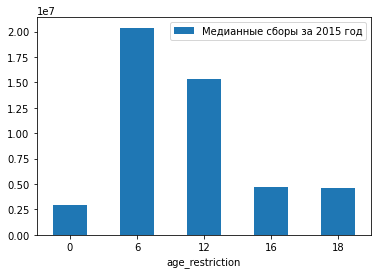

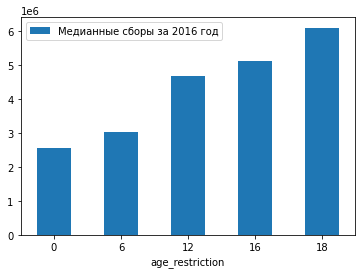

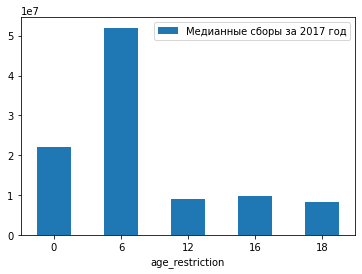

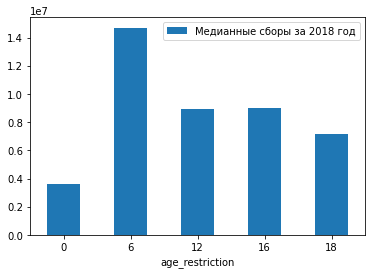

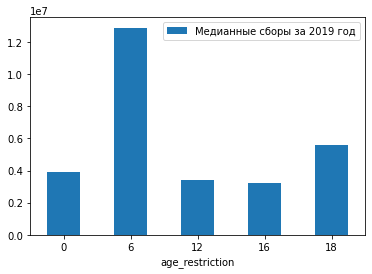

In [92]:
for year in years_list:
    data_after_2015.query('show_year == @year').pivot_table(index='age_restriction', values='box_office', aggfunc='median').plot(y='box_office', kind='bar', label=f'Медианные сборы за {year} год', rot=0)

**После анализа графика медианных сборов, можно сделать следующие выводы:**

Картина сильно отличается от графиков суммарных сборов, самая прибыльная категория - это категория 6+(она лидирует в большинстве годов), а рассматривая оставшиеся(0+, 12+, 16+, 18+) категории можно сказать, что категория 0+ теперь теперь примерно на одном уровне с другими категориями, которые с неольшими отклонениями собирают от года к году на равне друг с другом.

### Шаг 4. Исследование фильмов, которые получили государственную поддержку

Выделим из датасета ту группу записей, в которых хранится информация о фильмах, получивших государственную поддержку:

In [93]:
data_with_support = data.query('refundable_support > -1')
data_with_support

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office,show_year,main_genre,main_director,part_of_support_in_budget
1281,Пока еще жива,111005313,2013-10-11 12:00:00+00:00,Художественный,"АНО содействия развитию кинематографии ""Ангел-...",Россия,А.Атанесян,"А.Атанесян, М.Бабаханов, Р.Бутко",16,0,26500000,79411900,Министерство культуры,8,"драма, мелодрама",365353,2013,драма,А.Атанесян,33
1448,Бесславные придурки,111003314,2014-03-28 12:00:00+00:00,Художественный,"ООО ""Компания ""АТК-Студио""",Россия,А.Якимчук,А.Тютрюмов,12,0,26000000,37142857,Министерство культуры,NaN,unknown,28140,2014,unknown,А.Якимчук,70
1498,Невидимки,111004213,2013-09-10 12:00:00+00:00,Художественный,"ООО ""Компания ""РЕАЛ-ДАКОТА""",Россия,"Р.Давлетьяров, С.Комаров","Р.Давлетьяров, А.Котелевский, А.Олейников",12,0,107847945,176023490,Фонд кино,5,"комедия, фантастика",19957031,2013,комедия,Р.Давлетьяров,61
1524,БЕРЦЫ,111004314,2014-05-05 12:00:00+00:00,Художественный,"ООО ""Студия ""Пассажир""",Россия,Е.Миндадзе (псевдоним Катя Шагалова),Л.Антонова,16,0,28000000,40574140,Министерство культуры,4,драма,55917,2014,драма,Е.Миндадзе (псевдоним Катя Шагалова),69
1792,Братья Ч,111004414,2014-04-23 12:00:00+00:00,Художественный,"ООО ""Студия ""Пассажир""",Россия,М.Угаров,"А.Миндадзе, Л.Антонова",16,0,25000000,40015122,Министерство культуры,6,драма,232100,2014,драма,М.Угаров,62
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7463,Союз спасения,111022019,2019-12-26 12:00:00+00:00,Художественный,"ЗАО ""Дирекция кино""",Россия,А.Кравчук,"А.Максимов, К.Эрнст",12,100000000,400000000,980000000,Фонд кино,6,"биография, драма, история",717703185,2019,история,А.Кравчук,51
7465,Иван Царевич и Серый Волк 4,114005019,2019-12-20 12:00:00+00:00,Анимационный,"ООО ""Студия анимационного кино ""Мельница""",Россия,"Д.Шмидт, К.Феоктистов","С.Сельянов, А.Боярский",6,100000000,0,190000000,Фонд кино,7,"мультфильм, приключения, семейный",501069235,2019,мультфильм,Д.Шмидт,53
7473,Вторжение,111022519,2019-12-23 12:00:00+00:00,Художественный,"ООО ""Арт Пикчерс Студия"", ООО ""Водород 2011""",Россия,Ф.Бондарчук,"Ф.Бондарчук, М.Врубель, А.Андрющенко, Д.Рудовский",12,100000000,400000000,944000000,Фонд кино,6,"боевик, фантастика",-1,2019,фантастика,Ф.Бондарчук,53
7475,Я свободен,111023019,2019-12-26 12:00:00+00:00,Художественный,"АО ""ТПО ""Киностудия им. М.Горького""",Россия,И.Северов,С.Зернов,12,0,30000000,46154000,Министерство культуры,6,драма,-1,2019,драма,И.Северов,65


Посмотрим, сколько средст выделяется ежегодно на поддержку кино:

In [94]:
data_with_support.groupby('show_year')[['refundable_support', 'nonrefundable_support']].agg('sum')

,refundable_support,nonrefundable_support
show_year,,
2013,0,134347945
2014,71000000,501002299
2015,637153119,3019088340
2016,921500000,3381655482
2017,719346881,2464624781
2018,662000000,2784969465
2019,928000000,3976000000


По этим данны построим "график наполнения", чтоб визуализировать и оценить динамику изменения рассматриваемых величин по годам

<AxesSubplot:xlabel='show_year'>

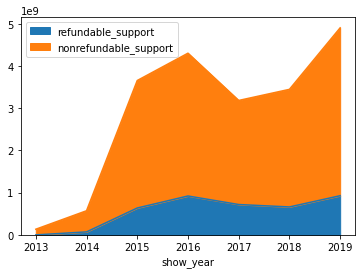

In [95]:
data_with_support.groupby('show_year')[['refundable_support', 'nonrefundable_support']].agg('sum').plot(kind='area')

Начиная с 2013 года на поддержку фильмов кол-во средств, выделяемых на безвозвратной основе для поддержки фильмов, значительно увеличивается. Кол-во средств, которые предполагается вернуть в бюджет было минимальным в 2013 году, и маскимальным в 2019.

Проверим окупаемость таких фильмов, однако стоит заметить, что окупаемость будем рассматривать с двух сторон:
 - Сборы превысили общий бюджет фильма
 - Сборы превысили кол-во государственных средств поддержки на возвратной основе

In [96]:
data_with_support.query('box_office > budget')

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office,show_year,main_genre,main_director,part_of_support_in_budget
1869,А зори здесь тихие..._,111002915,2015-03-16 12:00:00+00:00,Художественный,"ООО ""Компания ""Реал-Дакота""",Россия,Р.Давлетьяров,unknown,12,50000000,100000000,220588394,Фонд кино,8,"военный, драма, история",249166767,2015,драма,Р.Давлетьяров,68
1902,Призрак_.,111001815,2015-03-02 12:00:00+00:00,Художественный,"ООО ""Водород 2011""",Россия,А.Войтинский,С.Сельянов,6,0,75000000,139551503,Фонд кино,7,"боевик, приключения, триллер",352804320,2015,триллер,А.Войтинский,54
1986,Елки Лохматые,111023114,2014-12-10 12:00:00+00:00,Художественный,"ООО ""ТаББаК""",Россия,Максим Свешников,"Тимур Бекмамбетов, Евгения Аронова",6,26000000,30000000,80000000,Фонд кино,5,"комедия, семейный",121225633,2014,семейный,Максим Свешников,70
2004,Снежная Королева 2: Перезаморозка,114000214,2014-11-13 12:00:00+00:00,Анимационный,"ООО ""ВИЗАРТ ФИЛЬМ""",Россия,А.Цицилин,"ООО ""ВИЗАРТ ФИЛЬМ"", ООО ""ТаББаК""",0,30000000,40000000,252489571,Фонд кино,6,"мультфильм, приключения, фэнтези",313489846,2014,мультфильм,А.Цицилин,28
2057,Дуxless 2,111000415,2015-01-26 12:00:00+00:00,Художественный,"ООО ""Киностудия ""Слово"", ООО ""Арт Пикчерс Студия""",Россия,Р.Прыгунов,"П.Ануров, Ф.Бондарчук, Д.Рудовский",16,0,75000000,75000000,Фонд кино,7,драма,446163511,2015,драма,Р.Прыгунов,100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6971,Верность,111009119,2019-06-13 12:00:00+00:00,Художественный,"ООО ""Друг Друга"", ООО ""1-2-3 Продакшн""",Россия,Н.Сайфуллаева,"С.Корнихин, В.Федорович, Е.Никишов, П.Лилиенфе...",18,0,30000000,46300000,Министерство культуры,6,драма,97637352,2019,драма,Н.Сайфуллаева,65
6990,Давай разведемся!,111009519,2019-06-12 12:00:00+00:00,Художественный,"ООО Кинокомпания ""Глобус-фильм""",Россия,А.Пармас,"С.Сельянов, К.Эрнст, Н.Дрозд-Макан",12,0,25000000,38000000,Министерство культуры,6,комедия,103098290,2019,комедия,А.Пармас,66
7452,Фиксики против кработов,114004819,2019-12-21 12:00:00+00:00,Анимационный,"АО ""Аэроплан""",Россия,"В.Бедошвили, О.Ужинов, И.Пшонкин, Д.Цыбулькин","Г.Васильев, С.Саркисов, И.Попов",6,80000000,40000000,270000000,Фонд кино,8,"детский, мультфильм, приключения",387590521,2019,мультфильм,В.Бедошвили,44
7455,Холоп,111021719,2019-12-19 12:00:00+00:00,Художественный,"ООО ""МЕМ-МЕДИА"" по заказу АО ""ВБД Груп""",Россия,К.Шипенко,"Э.Илоян, Д.Жалинский, В.Дусмухаметов, Т.Бадзие...",12,25000000,35000000,160000000,Фонд кино,7,комедия,3073568690,2019,комедия,К.Шипенко,38


In [97]:
data_with_support.shape

(332, 20)

Как можно заметить, в датасете нашлось 79 записей о фильмах, сборы которых превысили общий бюджет фильма, что составляет:

In [98]:
(len(data_with_support.query('box_office > budget')) / data_with_support.shape[0])*100

23.795180722891565

Чуть больше 23.7% из всех фильмов, получивших поддержку государства. Посмотрим, сколько же проектов смогли собрать в прокате больше, чем получили возвратных средств:

In [99]:
data_with_support.query('box_office > refundable_support  and refundable_support != 0')

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office,show_year,main_genre,main_director,part_of_support_in_budget
1869,А зори здесь тихие..._,111002915,2015-03-16 12:00:00+00:00,Художественный,"ООО ""Компания ""Реал-Дакота""",Россия,Р.Давлетьяров,unknown,12,50000000,100000000,220588394,Фонд кино,8,"военный, драма, история",249166767,2015,драма,Р.Давлетьяров,68
1986,Елки Лохматые,111023114,2014-12-10 12:00:00+00:00,Художественный,"ООО ""ТаББаК""",Россия,Максим Свешников,"Тимур Бекмамбетов, Евгения Аронова",6,26000000,30000000,80000000,Фонд кино,5,"комедия, семейный",121225633,2014,семейный,Максим Свешников,70
2004,Снежная Королева 2: Перезаморозка,114000214,2014-11-13 12:00:00+00:00,Анимационный,"ООО ""ВИЗАРТ ФИЛЬМ""",Россия,А.Цицилин,"ООО ""ВИЗАРТ ФИЛЬМ"", ООО ""ТаББаК""",0,30000000,40000000,252489571,Фонд кино,6,"мультфильм, приключения, фэнтези",313489846,2014,мультфильм,А.Цицилин,28
2141,Территория,111000515,2015-01-27 12:00:00+00:00,Художественный,"ООО ""Творческое объединение ""Кинокомпания ""Анд...",Россия,А.Мельник,А.Мельник,12,30000000,30000000,500000000,Фонд кино,7,"детектив, триллер, фэнтези",72578317,2015,детектив,А.Мельник,12
2287,12 месяцев. Новая сказка,111014414,2014-10-16 12:00:00+00:00,Художественный,"ООО ""Киностудия ""Никола-фильм"", ООО ""Инвестмен...",Россия,Д.Елеонский,И.Каленов,0,15000000,5000000,90120000,Фонд кино,4,"семейный, фэнтези",32244810,2014,семейный,Д.Елеонский,22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7374,Тварь,111019419,2019-11-26 12:00:00+00:00,Художественный,"ООО ""СОК""",Россия,О.Городецкая,"П.Зарукин, О.Филипук, Ф.Ламшин, М.Абрамов, Н.Т...",16,5000000,35000000,78422212,Фонд кино,5,"драма, триллер",18617156,2019,триллер,О.Городецкая,51
7452,Фиксики против кработов,114004819,2019-12-21 12:00:00+00:00,Анимационный,"АО ""Аэроплан""",Россия,"В.Бедошвили, О.Ужинов, И.Пшонкин, Д.Цыбулькин","Г.Васильев, С.Саркисов, И.Попов",6,80000000,40000000,270000000,Фонд кино,8,"детский, мультфильм, приключения",387590521,2019,мультфильм,В.Бедошвили,44
7455,Холоп,111021719,2019-12-19 12:00:00+00:00,Художественный,"ООО ""МЕМ-МЕДИА"" по заказу АО ""ВБД Груп""",Россия,К.Шипенко,"Э.Илоян, Д.Жалинский, В.Дусмухаметов, Т.Бадзие...",12,25000000,35000000,160000000,Фонд кино,7,комедия,3073568690,2019,комедия,К.Шипенко,38
7463,Союз спасения,111022019,2019-12-26 12:00:00+00:00,Художественный,"ЗАО ""Дирекция кино""",Россия,А.Кравчук,"А.Максимов, К.Эрнст",12,100000000,400000000,980000000,Фонд кино,6,"биография, драма, история",717703185,2019,история,А.Кравчук,51


Таких фильмов оказалось 83, что составляет

In [100]:
(len(data_with_support.query('box_office > refundable_support  and refundable_support != 0')) /  data_with_support.shape[0]) * 100

25.0

всего лишь 25% от общего числа фильмов, получивших поддержку на возвратной основе.

Окупаемость 25% для фильмов с поддержкой на возвратной основе и 23.7%  по сравнению с бюджетом - это очень мало. Фильмы показывают плохую окупаемость и явно сильно убыточны.

Посмотрим на рейтинги таких фильмов, как в общем, так и по годам:

In [101]:
data_with_support['ratings'].describe(),

(count   316
 mean      6
 std       1
 min       1
 25%       5
 50%       6
 75%       7
 max       9
 Name: ratings, dtype: float64,)

In [102]:
data_with_support['ratings'].median()

6.2

Медана и среднее почти равны и составляют 6.0 и 6.2 соответственно. Максимальный рейтинг фильма, получившего гос. поддержку был 9, а минимальный 1

In [103]:
rating_per_year = data_with_support.pivot_table(index='show_year', values='ratings', aggfunc=('median', 'mean'))
rating_per_year

,mean,median
show_year,,
2013,7,7
2014,6,6
2015,6,6
2016,6,6
2017,6,6
2018,6,6
2019,6,6


<AxesSubplot:xlabel='show_year'>

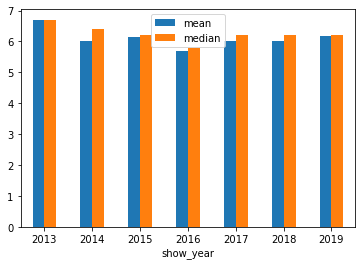

In [104]:
rating_per_year.plot(y=['mean', 'median'], kind='bar', rot=0)

В группировке по годам особых отклонений от общей статистики нет. Средний рейтинг и медианный рейтинг остаются в районе 6-6.2 с небольшими погрешностями


Посмотрим, на фильмы какого жанра чаще всего выделяются средства из бюджета:

In [105]:
data_with_support['main_genre'].value_counts()

драма          93
комедия        74
мультфильм     31
unknown        16
мелодрама      15
триллер        15
фэнтези        11
фантастика     11
ужасы          10
военный         9
приключения     7
семейный        7
боевик          6
детектив        5
мюзикл          4
история         4
детский         4
спорт           3
биография       3
криминал        3
реальное ТВ     1
Name: main_genre, dtype: int64

С большей частотой из средств гос. поддержки выделяют деньги на драмы и комедии(в 3 и 2 раза больше, чем на следующий пункты в списке), на третьем месте мультфильмы.

А фильмы какого типа чаще всего получают гос. поддержку

In [106]:
data_with_support['type'].value_counts()

Художественный    300
Анимационный       31
Документальный      1
Name: type, dtype: int64

Подавляющее большинство выпускаемых на средства государвственной поддержки фильмов - это художественные фильмы.

Давайте также узнаем, какой жанр приносит в среднем имеет больший доход и имеет большие средние рейтинги:

In [107]:
mean_per_genre = data_with_support.query('main_genre != "unknown"').groupby('main_genre')[['box_office', 'ratings']].agg('mean')
mean_per_genre

,box_office,ratings
main_genre,,
биография,172294345,7
боевик,99321489,7
военный,113074497,6
детектив,27709502,7
детский,753413,7
драма,102052087,6
история,363867058,5
комедия,168648344,6
криминал,79931288,8


In [108]:
mean_per_genre.sort_values(by='box_office', ascending=False)

,box_office,ratings
main_genre,,
спорт,989256129,7
история,363867058,5
мультфильм,181355294,6
биография,172294345,7
приключения,172228139,6
комедия,168648344,6
фантастика,156200389,6
военный,113074497,6
драма,102052087,6


In [109]:
mean_per_genre.sort_values(by='ratings', ascending=False)

,box_office,ratings
main_genre,,
криминал,79931288,8
детский,753413,7
спорт,989256129,7
биография,172294345,7
детектив,27709502,7
боевик,99321489,7
мюзикл,25426251,7
военный,113074497,6
драма,102052087,6


В среднем самые высокие сборы у фильмов про спорт, самые маленькие у детских. 

Самые высокие рейтинги у фильмов жанра "криминал" и "детский", а самые низкие у фильмов ужасов.

In [110]:
mean_per_director = data_with_support.query('box_office != -1').groupby('main_director')[['box_office', 'ratings']].agg('mean')

In [111]:
mean_per_director.sort_values(by='box_office', ascending=False)

,box_office,ratings
main_director,,
А.Мегердичев,2779686144,8
А.Сидоров,2271754004,6
О.Трофим,1445731797,NaN
Н.Лебедев,1402255390,8
К.Шипенко,1275924072,7
...,...,...
Е.Татаров,36550,5
К.Геворкян,35897,7
К.Сухарьков,19820,NaN


In [112]:
mean_per_director.sort_values(by='ratings', ascending=False)

,box_office,ratings
main_director,,
Ю.Кара,334750,9
Н.Степанова при участии С.Иванова,801370,9
А.Атанесян,365353,8
К.Оганисян,172871342,8
В.Татарский,58720,8
...,...,...
Е.Баранов,11011814,NaN
И.Угольников,87810,NaN
К.Сухарьков,19820,NaN


Режиссеры А.Мегердичев и Ю. Кара лидируют в списках средних сборов и среднего рейтинга соответственно.Однако неизвестно, насколько репрезентативна эта выборка, определим топ режиссеров по кол-ву фильмов в нашем списке.

In [113]:
top_count_director = data_with_support.query('box_office > -1').pivot_table(index='main_director', values='puNumber', aggfunc='count')
top_count_director.sort_values(by='puNumber', ascending=False).head(10)

,puNumber
main_director,
Р.Давлетьяров,5
С.Андреасян,4
Д.Дьяченко,4
К.Шипенко,3
А.Цицилин,3
А.Котт,3
Д.Шмидт,3
Н.Хомерики,3
С.Мокрицкий,3


Итак мы получили список 10 режиссеров, которые сняли больше всего фильмов, имея гос. поддержку. Теперь на основе этого списка посчитаем средние сборы и средний рейтнинг их фильмов.

In [114]:
top_count_director_scnd = data_with_support.query('box_office > -1').pivot_table(index='main_director', values='box_office', aggfunc=('count', 'mean'))

In [115]:
top_count_director_scnd = top_count_director_scnd.sort_values(by='count', ascending=False).head(10)
top_count_director_scnd

,count,mean
main_director,,
Р.Давлетьяров,5,59852586
С.Андреасян,4,227607549
Д.Дьяченко,4,601224658
К.Шипенко,3,1275924072
А.Цицилин,3,176775316
А.Котт,3,1157678
Д.Шмидт,3,470825212
Н.Хомерики,3,206047650
С.Мокрицкий,3,201988143


In [116]:
top_count_director_scnd.sort_values(by='mean', ascending=False)

,count,mean
main_director,,
К.Шипенко,3,1275924072
Д.Дьяченко,4,601224658
Д.Шмидт,3,470825212
С.Андреасян,4,227607549
Н.Хомерики,3,206047650
С.Мокрицкий,3,201988143
А.Цицилин,3,176775316
А.Аксененко,3,70909606
Р.Давлетьяров,5,59852586


Режиссер с наибольшими средними сборами из топ10 режиссеров - К. Шипенко, меньше всех в среднем по сборам из топ10 А.Котт.

In [117]:
top_count_director_thrd = data_with_support.query('box_office > -1').pivot_table(index='main_director', values='ratings',
aggfunc=('count', 'mean'))

In [118]:
top_count_director_thrd = top_count_director_thrd.sort_values(by='count', ascending=False).head(10)
top_count_director_thrd

,count,mean
main_director,,
Р.Давлетьяров,5,7
Д.Дьяченко,4,6
С.Андреасян,4,6
С.Мокрицкий,3,7
Н.Хомерики,3,6
А.Цицилин,3,6
К.Шипенко,3,7
А.Котт,3,6
Д.Шмидт,3,6


In [119]:
top_count_director_thrd.sort_values(by='mean', ascending=False)

,count,mean
main_director,,
К.Шипенко,3,7
Р.Давлетьяров,5,7
С.Мокрицкий,3,7
А.Цицилин,3,6
Д.Шмидт,3,6
Н.Хомерики,3,6
С.Андреасян,4,6
А.Котт,3,6
Д.Дьяченко,4,6


Из топ10 режиссеров лучший по среднему рейтингу все так же К. Шиппенко, а худший А. Аксененко



### Шаг 5. Общий вывод

В ходе иследования былы получены следующие выводы:

- Больше всего фильмов выходило в 2010 году, а меньше всего в 2017.
- Количество фильмов с данными о прокате наименьшее в 2010 и сильно увеличивается впоследствии
- Среднее значение по сборам мешьше всего с 2010 по 2013, максимальное а наибольшее в 2017.
- Медианное значение по сборам меньше всего в 2010-2014 годах, а максимальное в 2017-2018 годах.
- Меньше всего суммарно собирают фильмы с возрастным ограничением "0+", а больше всего в категории "16+", ввыборке по каждому представленному году картина почти не меняется. При рассмотрении медианных сборов, самая прибыльная категория "6+", а остальные примерно равны с небольшими отклонениями
- Меньше всего средств из гос. бюджета на поддержку фильмов выделяли в 2013 году, впоследствии количество выделяемых средств сильно увеличилось(c 2015 по 2019 выделяется примерно 5 млрд рублей ежегодно)
- Окупаемость фильмов, на которые выделили средства поддержки около 25%
- Средний рейтинг фильмов, получивших средства поддержки около 6.0
- Самый частый жанр фильмов, получивших средства поддержки - драма
- Самый частый тип фильмов, получивших средства поддержки - художественные фильмы
- В среднем самые высокие сборы у фильмов про спорт, самые маленькие у детских. 
- Самые высокие рейтинги у фильмов жанра "криминал" и "детский", а самые низкие у фильмов ужасов.
- Режиссер с наибольшими средними сборами из топ10 по кол-ву фильмов - К. Шипенко, меньше всех в среднем по сборам из этого топа А.Котт.
- Из топ 10 режиссеров по кол-ву фильмов лучший по среднему рейтингу К. Шиппенко, а худший А. Аксененко